# <span style="color:blue"> Esercizio 2
# 2.01
L'obiettivo dell'esercizio è stimare il valore di     
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$ per mezzo di metodi montecarlo. 

### A. Distribuzione Uniforme
La prima stima dell'integrale è stata ottenuta campionando da una distribuzione uniforme in $[0; 1]$ un certo numero di variabili casuali $x_i$ e calcolando la media aritmetica dei valori di $f(x_i)$ . Infatti, data una funzione $f(x)$, è possibile stimare l'integrale di $f$ fra $[a; b]$ come $$I=\int_a^b f(x)dx=(b-a)\lim_{N \to \infty} \frac{1}{N}\sum\limits_{i=1}^N f(x_i) = (b-a)<f>_{[a;b]}$$
L'incertezza è stata stimata con il metodo a blocchi: sono stati effettuati $M=10^6$ campionamenti per $N=100$ blocchi. 


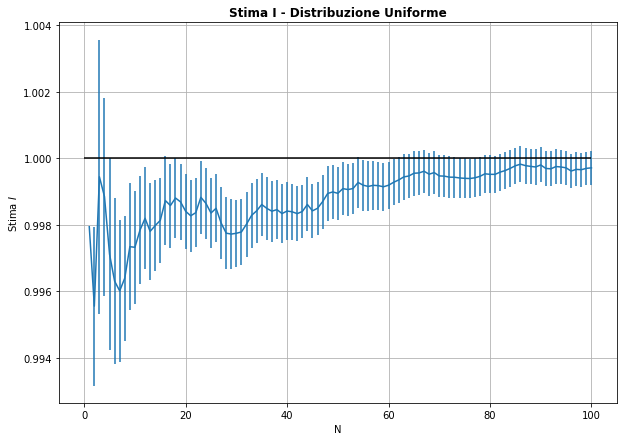

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x,y,err=np.loadtxt("ex_2.01/Iunif.out", usecols=(0, 1, 2), unpack=True)

fig=plt.figure(figsize=(10, 7))

plt.errorbar(x/10000,y,yerr=err,)

plt.hlines(1, 0, 100)
plt.xlabel('N')
plt.ylabel('Stima $I$')
plt.title("Stima I - Distribuzione Uniforme", fontweight="bold")
plt.grid(True)
plt.show()


### B. Metodo Importance Sampling
Il metodo dell'Importance Sampling consiste nell'utilizzare una distribuzione di probabilità più simile possibile alla funzione integranda: si può dimostrare che questo permette di ridurre la varianza del calcolo, come si può notare dal grafico. 
    Infatti, per stimare $I=\int_a^b g(x)p(x)dx$ si può utilizzare una distribuzione di probabilità $d(x)$ modificando la funzione integranda come $I=\int_a^b [\frac{g(x)p(x)}{d(x)}]d(x)dx $ con $d(x)\ge0$ $\forall x$ e $\int d(x) dx =1$.
La stima dell'integrale $I$ risulta essere uguale a $\frac{1}{N}\sum\limits_{i=1}^N [\frac{g(x_i)p(x_i)}{d(x_i)}] $ con $x_i$ campionati secondo la distribuzione $d(x)$.

Conoscendo il valore $I$ dell'integrale e sapendo che $g(x)\ge0 $ dal metodo dei moltiplicatori di Lagrange si ricava che la distribuzione $d(x)$ che minimizza la varianza ($\sigma^2$=0 ) risulta essere $d(x)=\frac{g(x)p(x)}{I}$.
Per la risoluzione dell'esercizio è stata utilizzato la tecnica del rigetto al fine di ottenere una distribuzione d(x) pari allo sviluppo al quarto ordine della funzione di partenza, ovvero $\frac{1}{C}(\frac{\pi}{2}-\frac{\pi^3x^2}{16}+\frac{\pi^5x^4}{768})$ nell'intervallo $[0,1]$ (che soddifa le condizioni imposte a $d(x)$ con $C=1.00452485553$; Lo sviluppo non è stato arrestato al secondo ordine perchè non soddisfava la condizione $d(x) \geq 0$ per $x$ in $[0, 1]$).

Infine il valore dell'incertezza è stato nuovamente stimato con il metodo a blocchi con gli stessi valori di M e N.

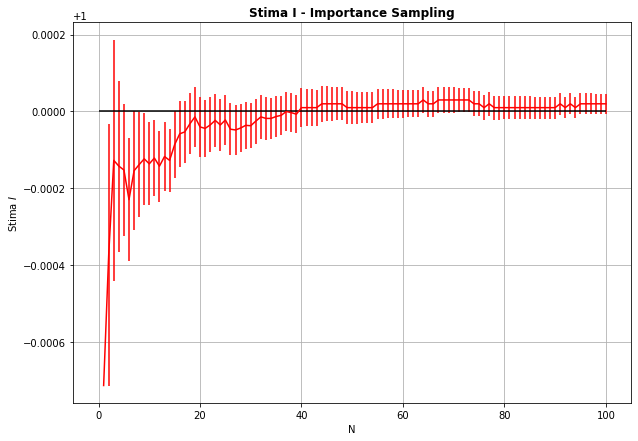

In [3]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np

x,y,err=np.loadtxt("ex_2.01/IImpSam.out", usecols=(0, 1, 2), unpack=True)

fig=plt.figure(figsize=(10, 7))
plt.errorbar(x/10000,y,yerr=err, color ="red")
plt.hlines(1, 0, 100)
plt.xlabel('N')
plt.ylabel('Stima $I$')
plt.title("Stima I - Importance Sampling", fontweight="bold")
plt.grid(True)
plt.show()

##### Commento: 
Come si può notare dalle rappresentazioni grafiche, l'incertezza risulta essere inferiore di circa un ordine di grandezza con il metodo dell'Importance Sampling, a parità di metodo di valutazione dell'incertezza e step. 

# 2.02

L'esercizio in questione richiede di simulare un random walk all'interno di un reticolo cubico 3D. I due risultati seguenti corrispondo ad una simulazioni con passi discreti oppure continui nello spazio. Per entrambi i risultati sono state effettuate $M=10^4$ simulazioni di $N=100$ passi. Per ogni passo è stata calcolata l'incertezza con il metodo a blocchi utilizzando 100 blocchi, ognuno composto da $L=\frac{M}{N_{blocchi}}$ simulazioni. 
Per ogni simulazione infine, è stato graficato il valore $\sqrt{<r^2>}$ e la sua incertezza, ottenuta dall'incertezza statitica $\sigma_{<r^2>}$ e propagata come $\sigma_{\sqrt{<r^2>}}=\frac{\sigma_{<r^2>}}{2\sqrt{<r^2>}}$.

### A. Spazio Discreto
La prima simulazione avviene in uno spazio discreto con un passo nelle direzioni $x,y,z$ di valore $\pm a=1$. Per ogni passo è stata estratta prima la direzione ($x,y,z$) e poi il verso ($\pm 1$) in modo casuale e indipendente. Ad ogni passo temporale discreto corrisponde uno spostamento discreto di modulo $a$. Infine è stato calcolato e rappresentato il fit della curva, ottenuto linearizzando la legge di potenza e applicando il metodo dei minimi quadrati.

Esponente 0.500305175746933 +- 0.0010424308818679656
Costante k 0.9979825123368948 +- 0.0016422462370857078


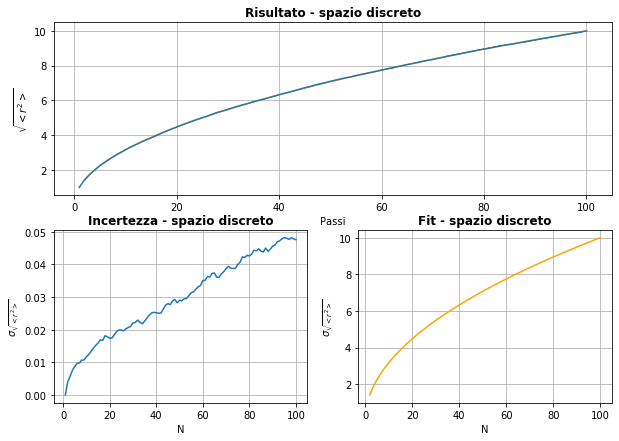

In [65]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
from scipy import optimize

# Fitting the data -- Least Squares Method
#  y = a * x^b
#  log(y) = log(a) + b*log(x)

xdata,ydata,yerr=np.loadtxt("ex_2.02/discreto.out",skiprows=1, usecols=(0, 1, 2), unpack=True) #salto riga con 0

logx = np.log10(xdata)
logy = np.log10(ydata)
logyerr = yerr / ydata

# define fitting function
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [1.0, 0.5]
out = optimize.leastsq(errfunc, pinit,
                       args=(logx, logy, logyerr), full_output=1)

pfinal = out[0]
covar = out[1]

index = pfinal[1]
amp = 10.0**pfinal[0]

indexErr = np.sqrt( covar[1][1] )
ampErr = np.sqrt( covar[0][0] ) * amp

print ("Esponente", index , "+-", indexErr)
print ("Costante k", amp, "+-", ampErr)

powerlaw = lambda a, i, x: a*((x)**i)


x,y,err=np.loadtxt("ex_2.02/discreto.out", usecols=(0, 1, 2), unpack=True)


fig=plt.figure(figsize=(10, 7))

plt.subplot(211)
plt.errorbar(x,y,yerr=err)
plt.xlabel('Passi')
plt.ylabel('$\sqrt{<r^2>}$')
plt.title("Risultato - spazio discreto", fontweight="bold")
plt.plot(xdata, powerlaw(amp, index, xdata), color = "orange")
plt.grid(True)

x,y=np.loadtxt("ex_2.02/discreto.out", usecols=(0, 2), unpack=True)
plt.subplot(223)

plt.errorbar(x,y)
plt.xlabel('N')
plt.ylabel('$\sigma_{\sqrt{<r^2>}}$')
plt.title("Incertezza - spazio discreto", fontweight="bold")
plt.grid(True)

plt.subplot(224)

plt.plot(xdata, powerlaw(amp, index, xdata), color = "orange")
plt.xlabel('N')
plt.ylabel('$\sigma_{\sqrt{<r^2>}}$')
plt.title("Fit - spazio discreto", fontweight="bold")
plt.grid(True)


plt.show()

### A. Spazio Continuo
Diversamente da prima, il reticolo 3D in cui si muove il camminatore è continuo e perciò, per ogni passo di modulo $a$, viene estratta casualmente una coppia $(\theta,\phi)$. 

La distribuzione di probabilità $f(x)$ corrispondente all'estrazione di un punto casuale sulla sfera risulta essere $\frac{1}{4\pi}$ in modo che $\int_S f(x)dA=1$. Essendo $dA$, l'elemento di area infinitesimo sulla sfera, pari a $sin(\theta)d\theta d\phi$, segue che $f(x)dA=f(\theta, \phi)sin(\theta)d\theta d\phi$.
Calcolando le distribuzioni di probabilità singole otteniamo che $f(\theta)=\int_0^{2\pi}f(\theta, \phi) d\phi=\frac{sin(\theta)}{2}$ e $f(\phi)=\int_0^{\pi}f(\theta, \phi) d\theta = \frac{1}{2\pi}$. 
Infine, applicando il metodo della trasformazione, otteniamo: 
$$\theta=arccos(2y -1) $$
$$\phi=2\pi y $$
con $y$ estratta uniformemente in $[0,1)$. 
Per quanto riguarda il calcolo dell'incertezza e il fit si è utilizzato il medesimo procedimento del caso discreto. 




Esponente 0.4996668617143996 +- 0.0009877714663875502
Costante k 1.0015475554405204 +- 0.0016036045761013977


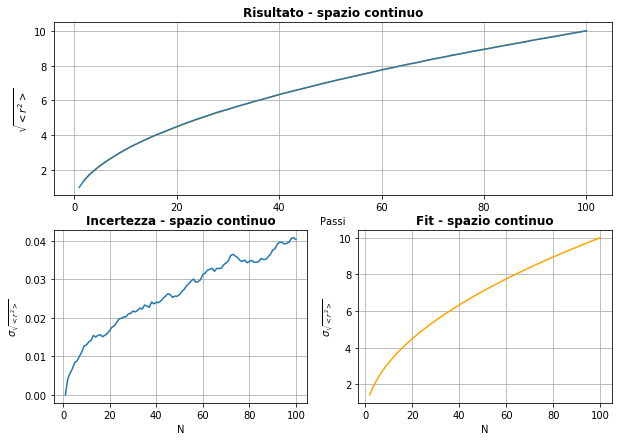

In [68]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
from scipy import optimize

# Fitting the data -- Least Squares Method
#  y = a * x^b
#  log(y) = log(a) + b*log(x)

xdata,ydata,yerr=np.loadtxt("ex_2.02/continuo.out",skiprows=1, usecols=(0, 1, 2), unpack=True) #salto riga con 0

logx = np.log10(xdata)
logy = np.log10(ydata)
logyerr = yerr / ydata

# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [1.0, 0.5]
out = optimize.leastsq(errfunc, pinit,
                       args=(logx, logy, logyerr), full_output=1)

pfinal = out[0]
covar = out[1]

index = pfinal[1]
amp = 10.0**pfinal[0]

indexErr = np.sqrt( covar[1][1] )
ampErr = np.sqrt( covar[0][0] ) * amp

print ("Esponente", index , "+-", indexErr)
print ("Costante k", amp, "+-", ampErr)

powerlaw = lambda a, i, x: a*((x)**i)


x,y,err=np.loadtxt("ex_2.02/continuo.out", usecols=(0, 1, 2), unpack=True)


fig=plt.figure(figsize=(10, 7))

plt.subplot(211)
plt.errorbar(x,y,yerr=err)
plt.xlabel('Passi')
plt.ylabel('$\sqrt{<r^2>}$')
plt.title("Risultato - spazio continuo", fontweight="bold")
plt.plot(xdata, powerlaw(amp, index, xdata), color = "orange")
plt.grid(True)

x,y=np.loadtxt("ex_2.02/continuo.out", usecols=(0, 2), unpack=True)
plt.subplot(223)

plt.errorbar(x,y)
plt.xlabel('N')
plt.ylabel('$\sigma_{\sqrt{<r^2>}}$')
plt.title("Incertezza - spazio continuo", fontweight="bold")
plt.grid(True)

plt.subplot(224)

plt.plot(xdata, powerlaw(amp, index, xdata), color = "orange")
plt.xlabel('N')
plt.ylabel('$\sigma_{\sqrt{<r^2>}}$')
plt.title("Fit - spazio continuo", fontweight="bold")
plt.grid(True)


plt.show()

###### Commento:
Da entrambi i fit si evince un comportamento pari a $K\, \sqrt{N}$, con $K=1$. Questo risultato è in accordo con un comportamento diffusivo. Dall'equazione di diffusione $\frac{\partial p_1(x, t)}{\partial t}=D\frac{\partial^2 p_1(x, t)}{\partial x^2}$ si ottiene che $<r^2>=2DN$, con $D=\frac{a^2}{2 \tau}$. Avendo graficato $\sqrt{<r^2>}$ e avendo scelto $a=1$ e $\tau=1$, il risultato atteso è di fatti $$\sqrt{<r^2>}=1\, \sqrt{N}$$.